In [34]:
import os 
import subprocess
import resource # for timing the subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import six
import time

my_env = os.environ.copy()
my_env['DYLD_LIBRARY_PATH'] = "/Users/jasminexuereb/.opam/4.08.0/lib/z3" 
FNULL = open(os.devnull, 'w') # to hide console output of the subprocess

In [35]:
# initialize list of lists 
# data = [[1, 0.3286395, 0.6484685],[5, 1.940188, 4.663278999999999], [10, 27.780655, 338.726325]] 
df = pd.read_csv("RunningTimes.csv")

# Create the pandas DataFrame 
# df = pd.DataFrame(data, columns = ['Complexity','Choice', 'Recursion','NestedIFs']) 
# df['Complexity'] = df.index+1
# df

df

,Complexity,Choice,Recursion,NestedIFs
0,1,0.052374,0.072484,0.053887
1,2,0.074695,0.116373,1.537146
2,3,0.104537,0.177422,28.514990
3,4,0.149514,0.282522,inf
4,5,0.208836,0.419721,inf
5,6,0.298922,0.620728,inf
6,7,0.482963,1.120274,inf
7,8,0.764360,3.373627,inf
8,9,1.290531,24.547792,inf
9,10,2.442369,275.100198,inf


In [36]:
# plt.figure()
# to_plot = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Choice"], how="all")
# ax = to_plot.plot(kind='line', x='Complexity', y='Choice', legend=None, marker='o', color='g')
# plt.title("Choice Monitors")
# plt.xlabel("Complexity")
# plt.ylabel("Time (s)")
# plt.xticks(to_plot['Complexity'])
# plt.savefig("choice_base.png")

# plt.figure()
# to_plot = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"], how="all")
# ax = to_plot.plot(kind='line', x='Complexity', y='Recursion', legend=None, marker='o', color='b')
# plt.title("Recursion Monitors")
# plt.xlabel("Complexity")
# plt.ylabel("Time (s)")

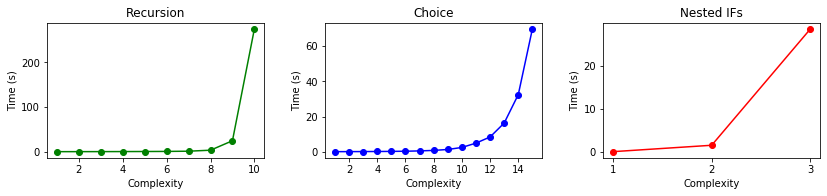

In [39]:
# Creates three subplots and unpacks the output array immediately
# maybe switch to grid
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figheight(3)
f.set_figwidth(12)
f.tight_layout(pad=3.0)

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"])
ax1.plot(df['Complexity'], df['Recursion'], marker='o', color='g')
ax1.set_title('Recursion')
ax1.set_xlabel("Complexity")
ax1.set_ylabel("Time (s)")

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Choice"])
ax2.plot(df['Complexity'], df['Choice'], marker='o', color='b')
ax2.set_title('Choice')
ax2.set_xlabel("Complexity")
ax2.set_ylabel("Time (s)")
#specify the number of ticks on both or any single axes
ax2.locator_params(axis='x', nbins=10)

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["NestedIFs"])
# to_plot = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"], how="all")
ax3.plot(df['Complexity'], df['NestedIFs'], marker='o', color='r')
ax3.set_title('Nested IFs')
ax3.set_xlabel("Complexity")
ax3.set_ylabel("Time (s)")
ax3.set_xticks(complexity['Complexity'])
# ax3.locator_params(axis='x', nbins=)

f.savefig('Figure.png')
